In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!ls /content/drive/MyDrive/Online_fraud_detection

code.ipynb  creditcard.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('/content/drive/MyDrive/Online_fraud_detection/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
data.shape

(284807, 31)

In [11]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
count_classes = data['Class'].value_counts()
print(count_classes)

Class
0    284315
1       492
Name: count, dtype: int64


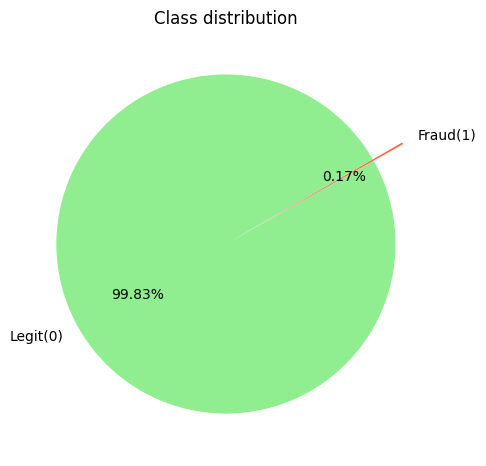

In [14]:
#ploting the figure
# 0 is legit, 1 is fraud
# the data is highlt imbalanced

plt.figure(figsize=(5,5))
plt.title('Class distribution')
plt.tight_layout()
labels = ['Legit(0)', "Fraud(1)"]
colors = ['lightgreen', 'tomato']
plt.pie(count_classes, colors=colors, labels=labels, autopct='%1.2f%%', startangle=30, explode=(0, 0.2))
plt.show()

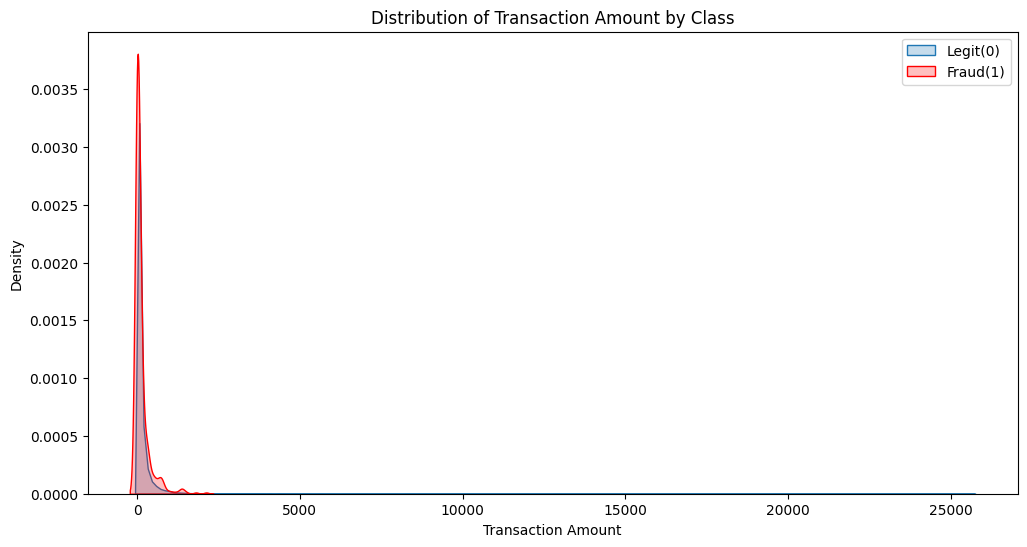

In [15]:
#let us see if fraud happens for small amount or for large amount
plt.figure(figsize=(12, 6))

#distribution for legit
sns.kdeplot(data[data['Class']==0]['Amount'], label='Legit(0)', fill = True)

#distribution for fraud
sns.kdeplot(data[data['Class']==1]['Amount'], label='Fraud(1)', fill = True, color='red')

plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

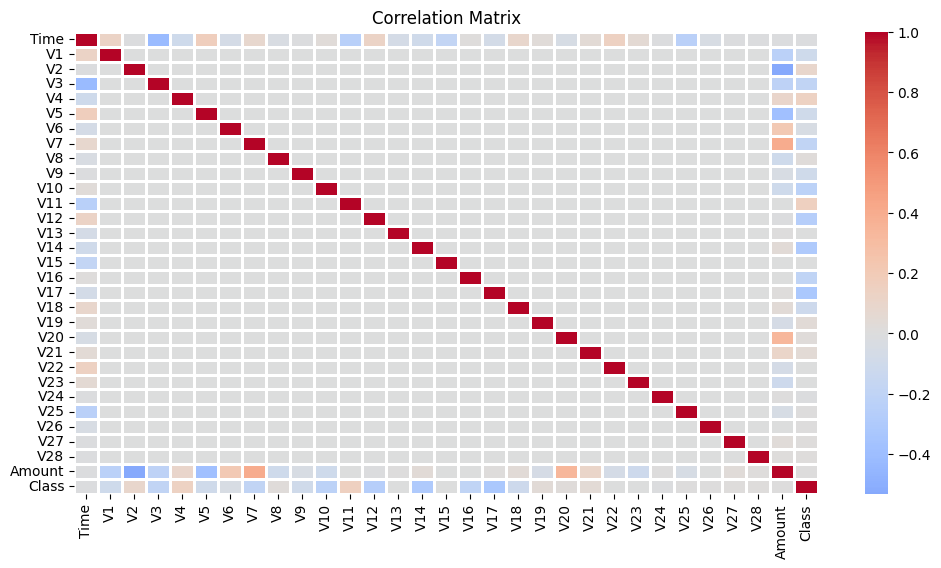

In [16]:
#You want to know which features "matter" when predicting fraud.
#Correlation tells us how much one column affects another.
#We’ll look for features most correlated with the "Class" column.


#compute correlation matrix
corr_matrix = data.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, cmap='coolwarm',  center=0, linewidths=1, annot=False)

plt.title('Correlation Matrix')
plt.show()

In [17]:
#train test split
from sklearn.model_selection import train_test_split
x = data.drop('Class', axis=1)
y = data['Class']

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.3,      #30% test data
    random_state=42,    #for reproducbility
    stratify=y
)

/tmp/ipython-input-18-3981606150.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[0], palette='Blues')
/tmp/ipython-input-18-3981606150.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=axes[1], palette='Reds')


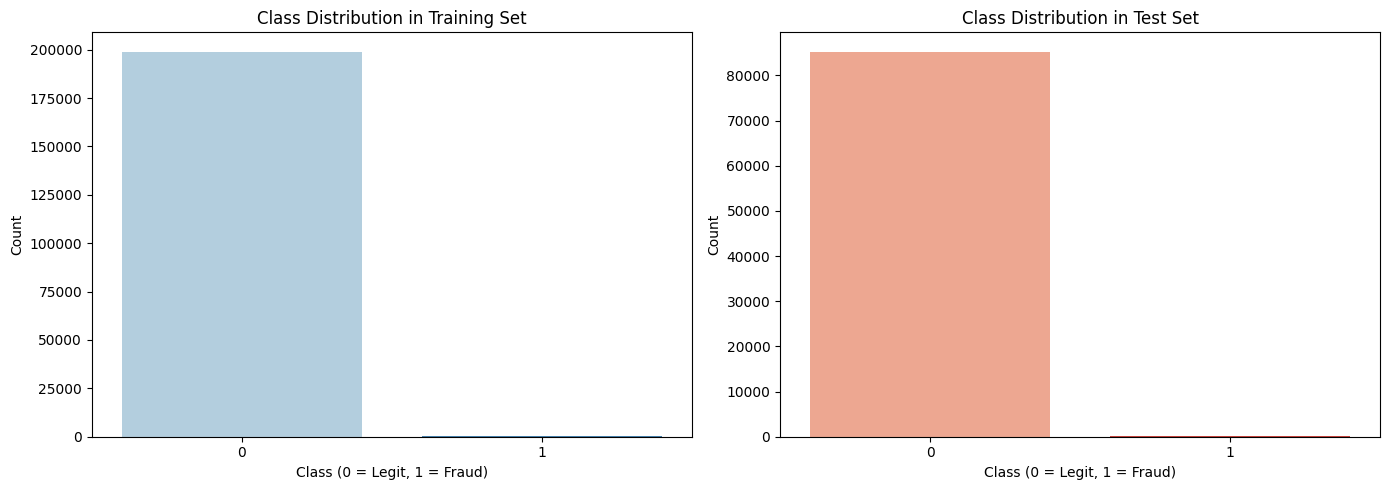

In [18]:
# Plot side-by-side countplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
sns.countplot(x=y_train, ax=axes[0], palette='Blues')
axes[0].set_title('Class Distribution in Training Set')
axes[0].set_xlabel('Class (0 = Legit, 1 = Fraud)')
axes[0].set_ylabel('Count')

# Test set
sns.countplot(x=y_test, ax=axes[1], palette='Reds')
axes[1].set_title('Class Distribution in Test Set')
axes[1].set_xlabel('Class (0 = Legit, 1 = Fraud)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [19]:
#scalling the data for accurate result as they may have very different scales

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [20]:
#logistic regression

#fit model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

#prediction
y_pred = model.predict(x_test)

#evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[85278    17]
 [   57    91]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.61      0.71       148

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443


Accuracy Score: 0.999133925541004


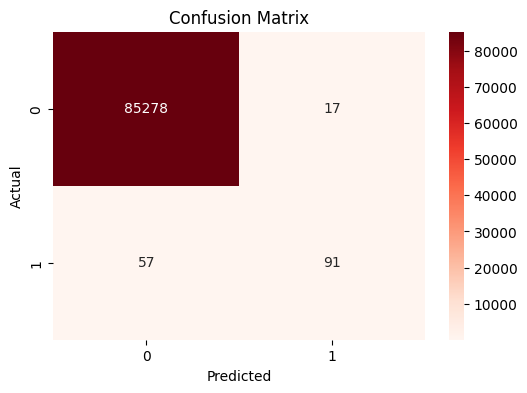

In [21]:
#visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
#training a random forest model
#create model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

#training
rf_model.fit(x_train, y_train)

#predict
y_pred_rf = rf_model.predict(x_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

Confusion Matrix:
 [[85290     5]
 [   36   112]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9995201479348805


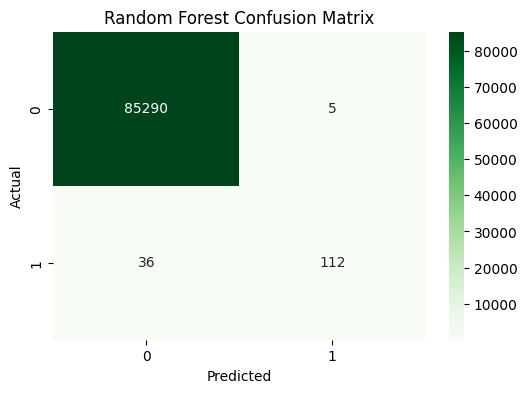

In [23]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
#Synthetic Minority Over-sampling Technique

# Then import sklearn

from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [25]:
# Check the class distribution before applying SMOTE
print("Before SMOTE:", Counter(y_train))

# Check the class distribution after applying SMOTE
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 199020, 1: 344})
After SMOTE: Counter({0: 199020, 1: 199020})


In [27]:
#retrain the model
# Initialize Logistic Regression
model = LogisticRegression(max_iter=1000)

# Train the model on the resampled data
model.fit(x_train_resampled, y_train_resampled)

# Predict on the original test set
y_pred = model.predict(x_test)

# Evaluation
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[83363  1932]
 [   18   130]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy Score: 0.9771777676345634


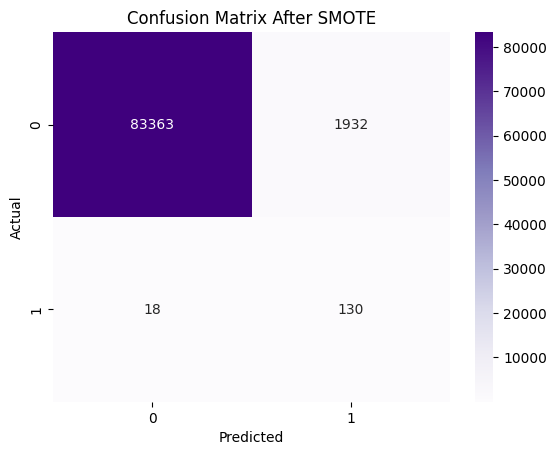

In [28]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix After SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [31]:
import joblib

# Save your trained model to a file
joblib.dump(model, 'online_fraud_detection.pkl')
print("Model saved successfully!")

Model saved successfully!


In [32]:
%%writefile fraud_detection_app.py

Writing fraud_detection_app.py


In [34]:
!pip install streamlit pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [36]:
!ngrok config add-authtoken "2yg6CR9tnGVG5f3TyrApHgtF5l3_7JubKYVJ9hBbmy6As7pR7"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [39]:
!nohup streamlit run app.py --server.enableCORS false --server.enableXsrfProtection false &

nohup: appending output to 'nohup.out'


In [42]:
from pyngrok import ngrok

# Kill all active ngrok tunnels
ngrok.kill()

In [43]:
from pyngrok import ngrok
import os

# Kill any running streamlit processes
!pkill streamlit

# Run the app in background
os.system("streamlit run /content/fraud_detection_app.py &")

# Open the port using ngrok
public_url = ngrok.connect("http://localhost:8501")
print("🌐 Your Streamlit app is live at:", public_url)

🌐 Your Streamlit app is live at: NgrokTunnel: "https://8fa6-34-147-65-148.ngrok-free.app" -> "http://localhost:8501"


In [44]:
!ls /content/drive/MyDrive

 0411211023020.jpg
'Ankita Ghosh.pdf'
'A Survey created by students of Basanti Devi College to know how many students are interested giving Online offline exams.gform'
'BANK DETAILS (HOTEL SONALI) (1).docx'
 Classroom
'Colab Notebooks'
 CUETPGScoreCard-243510078855.pdf
'Dr Anil Manjhi NITRR PCE.gdoc'
'eassy competition.pdf'
 IMG_20240419_094741.jpg
 keras_model.h5
 LMS.pdf
 MCA_II_CBCS_copy.pdf
'My first gold payment'
 Online_fraud_detection
 SE.pdf
 Stock_price_prediction_project
 toc.pdf
